# Fighting Novel Coronavirus COVID-19 with Data Science & Machine Learning.

*By: Ahmed A.Azeem (Biomedical Engineer), Cairo, Egypt.
email: eng.aa.azeem80@outlook.com*

## Abstract

In December 2019, A novel Coronavirus was found in a seafood wholesale market located in Wuhan, China., On 11 February 2020, WHO announced a name for the new coronavirus disease: COVID-19., And was recognised as a pandemic on 11 March 2020.

Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) a virus closely related to the SARS virus., The disease was discovered and named during the 2019–20 coronavirus outbreak, Those affected may develop a fever, dry cough, fatigue, and shortness of breath. A sore throat, runny nose or sneezing is less common. While the majority of cases result in mild symptoms, some can progress to pneumonia and multi-organ failure.

For more information & sources of trusted data:

- https://en.wikipedia.org/wiki/Coronavirus_disease_2019
- https://www.who.int/emergencies/diseases/novel-coronavirus-2019
- https://www.cdc.gov/coronavirus/2019-ncov/index.html
- https://www.ecdc.europa.eu/en/novel-coronavirus-china
- https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
- https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6
- https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

#### Methodology / Approach
CRISP-DM used as a data science methodology.

For more information:

- IBM https://www.ibmbigdatahub.com/blog/why-we-need-methodology-data-science
- IBM https://www.ibm.com/support/knowledgecenter/SS3RA7_15.0.0/com.ibm.spss.crispdm.help/crisp_overview.htm

- Intel® Data Analytics Acceleration Library (Intel® DAAL) Developer Guide (https://software.intel.com/sites/default/files/daal-developer-guide-2020-u1.pdf)

- Microsoft https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/overview

- CRISP-DM consists of six iterative stages.

  1. **Business Understanding**: Focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition and a preliminary plan.
  
  2. **Data Understanding**: Starts with initial data collection and proceeds with activities to get familiar with the data, identify data quality problems, discover first insights into the data, or detect interesting subsets to form hypotheses for hidden information.
  
  3. **Data Preparation**: The data preparation phase covers all activities to construct the final data set from the initial raw data.
  
  4. **Modeling**: Modeling techniques are selected and applied. Because some techniques like neural networks (a type of a predictive model) have specific requirements regarding the form of the data, there can be a loop back to data preparation.
  
  5. **Evaluation**: After one or more models are built that appear to have high quality based on whatever we are trying to predict, they need to be tested to ensure that they work against unseen data and that all key business issues are sufficiently considered. The result is the selection of the champion model.
  
  6. **Deployment**: Generally, deployment means deploying a code representation of the model into an operating system to score or categorize new unseen data as it arises and create a mechanism for the use of that new information in the solution of the original business problem. Importantly, the code representation must include all the data preparation steps leading up to modeling so that the model treats new raw data in the same manner as during model development.

### Dataset Source

*European Centre for Disease Prevention and Control*

Situation update worldwide, as of 19 October 2020. (The data has been collected between 6:00 and 10:00 CET)

In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline

In [2]:
#last updated dataset
url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'

In [3]:
import urllib.request
urllib.request.urlretrieve (url, "covid_state_oct.csv")

('covid_state_oct.csv', <http.client.HTTPMessage at 0x7f88a4c6e550>)

In [4]:
# Get data from European Centre for Disease Prevention and Control
covid_df = pd.read_csv('covid_state_oct.csv')

In [5]:
covid_df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,19/10/2020,19,10,2020,59,4,Afghanistan,AF,AFG,38041757.0,Asia,2.258045
1,18/10/2020,18,10,2020,68,3,Afghanistan,AF,AFG,38041757.0,Asia,2.218615
2,17/10/2020,17,10,2020,47,4,Afghanistan,AF,AFG,38041757.0,Asia,2.058265
3,16/10/2020,16,10,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.947860
4,15/10/2020,15,10,2020,32,1,Afghanistan,AF,AFG,38041757.0,Asia,1.992547


In [6]:
covid_df['dateRep'] = pd.to_datetime(covid_df['dateRep'], format='%d/%m/%Y')

In [7]:
covid_df.isna().sum()[covid_df.isna().sum()>0]

geoId                                                          219
countryterritoryCode                                            64
popData2019                                                     64
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2785
dtype: int64

In [8]:
covid_df.dtypes

dateRep                                                       datetime64[ns]
day                                                                    int64
month                                                                  int64
year                                                                   int64
cases                                                                  int64
deaths                                                                 int64
countriesAndTerritories                                               object
geoId                                                                 object
countryterritoryCode                                                  object
popData2019                                                          float64
continentExp                                                          object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000           float64
dtype: object

In [9]:
covid_df.rename(columns={'dateRep': 'Date', 'countriesAndTerritories': 'Country', 'cases': 'Confirmed','deaths': 'Deaths', 'continentExp': 'Continent'}, inplace=True)

In [10]:
covid_df.drop(['geoId', 'day', 'month', 'year', 'countryterritoryCode', 'popData2019', 'countryterritoryCode','Cumulative_number_for_14_days_of_COVID-19_cases_per_100000' ], axis=1, inplace=True)

In [11]:
covid_df.to_csv('sep2020_updated.csv')

In [12]:
ndf = pd.read_csv('sep2020_updated.csv',parse_dates=['Date'], index_col='Date')
ndf.head()

,Unnamed: 0,Confirmed,Deaths,Country,Continent
Date,,,,,
2020-10-19,0,59,4,Afghanistan,Asia
2020-10-18,1,68,3,Afghanistan,Asia
2020-10-17,2,47,4,Afghanistan,Asia
2020-10-16,3,0,0,Afghanistan,Asia
2020-10-15,4,32,1,Afghanistan,Asia


In [13]:
drop_these = ['Unnamed: 0']
ndf = ndf.drop(columns=drop_these, axis=1)

In [14]:
ndf.to_csv('new_df_oct2020.csv')

In [15]:
jdf = pd.read_csv('new_df_oct2020.csv',parse_dates=['Date'], index_col='Date')
jdf.head()

,Confirmed,Deaths,Country,Continent
Date,,,,
2020-10-19,59,4,Afghanistan,Asia
2020-10-18,68,3,Afghanistan,Asia
2020-10-17,47,4,Afghanistan,Asia
2020-10-16,0,0,Afghanistan,Asia
2020-10-15,32,1,Afghanistan,Asia


In [16]:
# Rename Countries
jdf['Country']= jdf['Country'].str.replace('Antigua_and_Barbuda','Antigua & Barbuda')
jdf['Country']= jdf['Country'].str.replace('United_Kingdom', 'UK')
jdf['Country']= jdf['Country'].str.replace('United_States_of_America', 'US')
jdf['Country']= jdf['Country'].str.replace('United_Arab_Emirates', 'Emirates')
jdf['Country']= jdf['Country'].str.replace('Holy_See', 'Vatican')
jdf['Country']= jdf['Country'].str.replace('Bosnia_and_Herzegovina','Bosnia & Herzegovina')
jdf['Country']= jdf['Country'].str.replace('Brunei_Darussalam','Brunei')
jdf['Country']= jdf['Country'].str.replace('Burkina_Faso','Burkina Faso')
jdf['Country']= jdf['Country'].str.replace('CANADA','Canada')
jdf['Country']= jdf['Country'].str.replace('Cases_on_an_international_conveyance_Japan','The Diamond Princess')
jdf['Country']= jdf['Country'].str.replace('Central_African_Republic','Central African Rep.')
jdf['Country']= jdf['Country'].str.replace('Costa_Rica','Costa Rica')
jdf['Country']= jdf['Country'].str.replace("Cote_dIvoire","Cote d'ivoire")
jdf['Country']= jdf['Country'].str.replace('Czech_Republic','Czech Rep.')
jdf['Country']= jdf['Country'].str.replace('Democratic_Republic_of_the_Congo','Congo-Kinshasa')
jdf['Country']= jdf['Country'].str.replace('Equatorial_Guinea','Guinea')
jdf['Country']= jdf['Country'].str.replace('Eswatini','Eswatini-Swaziland')
jdf['Country']= jdf['Country'].str.replace('New_Zealand','New Zealand')
jdf['Country']= jdf['Country'].str.replace('North_Macedonia','Macedonia')
jdf['Country']= jdf['Country'].str.replace('Saint_Lucia','Saint Lucia')
jdf['Country']= jdf['Country'].str.replace('Saint_Vincent_and_the_Grenadines','Saint Vincent')
jdf['Country']= jdf['Country'].str.replace('San_Marino','San Marino')
jdf['Country']= jdf['Country'].str.replace('Saudi_Arabia','Saudi Arabia')
jdf['Country']= jdf['Country'].str.replace('South_Africa','South Africa')
jdf['Country']= jdf['Country'].str.replace('South_Korea','South Korea')
jdf['Country']= jdf['Country'].str.replace('Sri_Lanka','Sri Lanka')
jdf['Country']= jdf['Country'].str.replace('Trinidad_and_Tobago','Trinidad & Tobago')
jdf['Country']= jdf['Country'].str.replace('United_Republic_of_Tanzania','Tanzania')
jdf['Country']= jdf['Country'].str.replace('Dominican_Republic','Dominican Rep.')

In [17]:
sum(jdf.duplicated())

24716

In [18]:
jdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49992 entries, 2020-10-19 to 2020-03-21
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Confirmed  49992 non-null  int64 
 1   Deaths     49992 non-null  int64 
 2   Country    49992 non-null  object
 3   Continent  49992 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.9+ MB


In [19]:
#duplicateRows = jdf[jdf.duplicated()]
#duplicateRows

In [20]:
# Select all duplicate rows based on one column
#duplicateRows = ndf[ndf.duplicated(['Country', 'Confirmed', 'Deaths'])]
#print("Duplicate Rows based on a 3 columns are:", duplicateRows, sep='\n')

In [21]:
jdf.head()

,Confirmed,Deaths,Country,Continent
Date,,,,
2020-10-19,59,4,Afghanistan,Asia
2020-10-18,68,3,Afghanistan,Asia
2020-10-17,47,4,Afghanistan,Asia
2020-10-16,0,0,Afghanistan,Asia
2020-10-15,32,1,Afghanistan,Asia


In [22]:
jdf.Continent.unique()

array(['Asia', 'Europe', 'Africa', 'America', 'Oceania', 'Other'],
      dtype=object)

In [23]:
jdf.Country.nunique()

210

In [24]:
# By Country
deaths_by_country = jdf.groupby(['Country'])['Deaths'].sum().to_frame(name = 'Deaths').reset_index()
deaths_by_country.columns = ['Country','Deaths']
deaths_by_country.sort_values(by='Deaths', ascending=False, inplace=True)
deaths_by_country.head(50)

,Country,Deaths
197,US,219674
27,Brazil,153905
90,India,114610
125,Mexico,86167
196,UK,43646
97,Italy,36543
178,Spain,33775
150,Peru,33759
69,France,33477
92,Iran,30375


In [25]:
# By Continent
deaths_by_continent = jdf.groupby(['Continent'])['Deaths'].sum().to_frame(name = 'Deaths').reset_index()
deaths_by_continent.columns = ['Continent','Deaths']
deaths_by_continent.sort_values(by='Deaths', ascending=False, inplace=True)
deaths_by_continent.head()

,Continent,Deaths
1,America,609981
3,Europe,241291
2,Asia,222596
0,Africa,39741
4,Oceania,1020


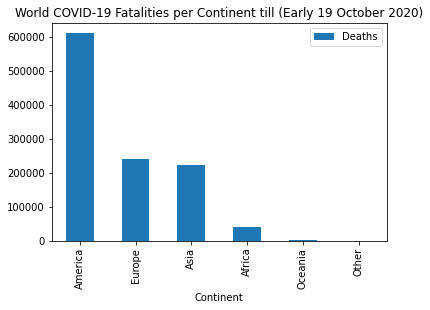

In [26]:
deaths_by_continent.plot(kind='bar', x='Continent', y='Deaths', legend=True)
plt.title("World COVID-19 Fatalities per Continent till (Early 19 October 2020)")
plt.savefig('wcov19contfate')

In [27]:
# By Country
confirmed_by_country = jdf.groupby(['Country'])['Confirmed'].sum().to_frame(name = 'Confirmed').reset_index()
confirmed_by_country.columns = ['Country','Confirmed']
confirmed_by_country.sort_values(by='Confirmed', ascending=False, inplace=True)
confirmed_by_country.head(50)

,Country,Confirmed
197,US,8154595
90,India,7550273
27,Brazil,5235344
157,Russia,1399334
7,Argentina,989667
42,Colombia,959572
178,Spain,936560
69,France,897034
150,Peru,868675
125,Mexico,851227


In [28]:
# By Continent
confirmed_by_continent = jdf.groupby(['Continent'])['Confirmed'].sum().to_frame(name = 'Confirmed').reset_index()
confirmed_by_continent.columns = ['Continent','Confirmed']
confirmed_by_continent.sort_values(by='Confirmed', ascending=False, inplace=True)
confirmed_by_continent.head()

,Continent,Confirmed
1,America,18866794
2,Asia,12437324
3,Europe,7118168
0,Africa,1646862
4,Oceania,37121


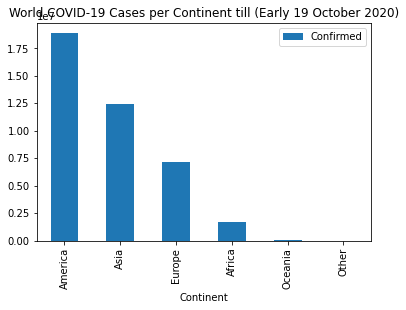

In [29]:
confirmed_by_continent.plot(kind='bar', x='Continent', y='Confirmed', legend=True)
plt.title("World COVID-19 Cases per Continent till (Early 19 October 2020)")
plt.savefig('wcov19contcases')

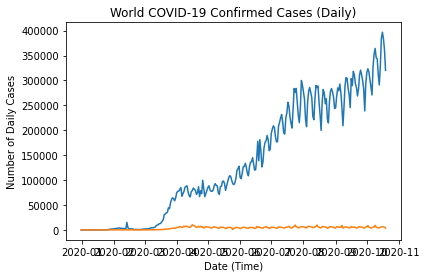

In [30]:
# Plot confirmed cases worldwide
cf = jdf.groupby('Date')[['Country', 'Confirmed', 'Deaths']].sum()

plt.xlabel('Date (Time)')
plt.ylabel('Number of Daily Cases')
plt.title('World COVID-19 Confirmed Cases (Daily)')

plt.plot(cf)

In [31]:
cf.describe()

,Confirmed,Deaths
count,294.000000,294.000000
mean,136418.248299,3791.278912
std,115174.896971,2590.486577
min,0.000000,0.000000
25%,10780.750000,356.750000
50%,103348.000000,4501.000000
75%,246533.750000,5684.250000
max,396737.000000,10434.000000


In [32]:
# Plot and save trendline graph
def create_trend_line(jdf, col3, col4):
    fig, ax = plt.subplots(figsize=(10,6))
    ndf.groupby(['Date'])[['Confirmed', 'Deaths']].sum().plot(ax=ax, marker='+')
    fig = ax.get_figure()

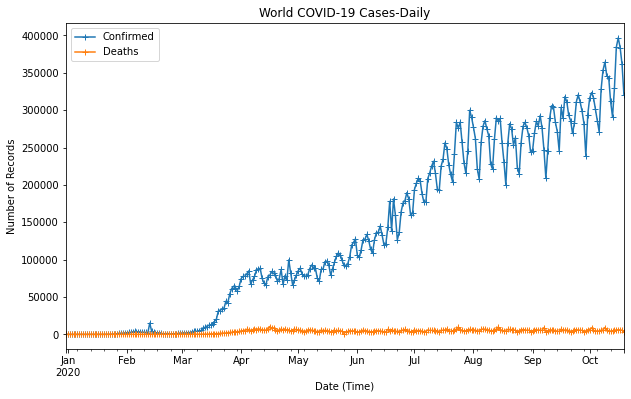

In [33]:
create_trend_line(jdf, 'Confirmed', 'Deaths')
plt.xlabel('Date (Time)')
plt.ylabel('Number of Records')
plt.title('World COVID-19 Cases-Daily')
plt.savefig('wcovid19daily')

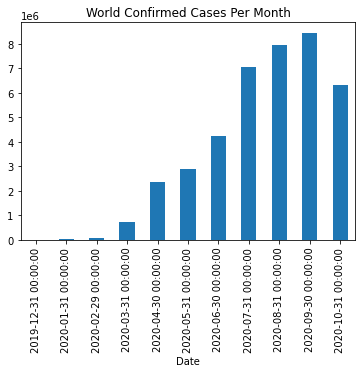

In [34]:
jdf['Confirmed'].resample('M').sum().plot(kind='bar', title='World Confirmed Cases Per Month')
plt.savefig('wcov19casespermonth')

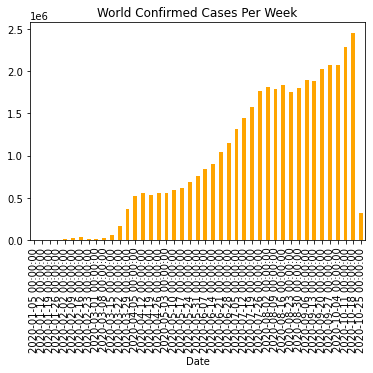

In [35]:
jdf['Confirmed'].resample('W').sum().plot(kind='bar', color='orange', title='World Confirmed Cases Per Week')
plt.savefig('wcov19casesperweek')

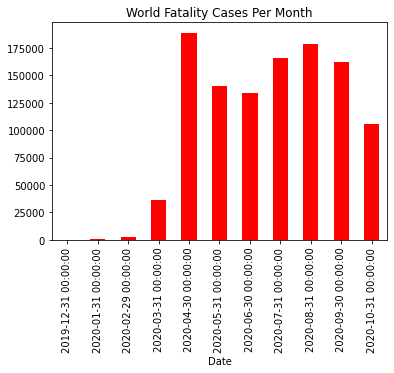

In [36]:
jdf['Deaths'].resample('M').sum().plot(kind='bar', color='red', title='World Fatality Cases Per Month')
plt.savefig('wcov19fatpermonth')

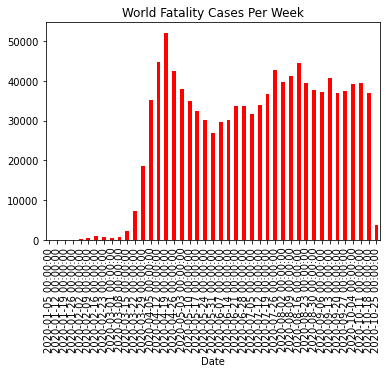

In [37]:
jdf['Deaths'].resample('W').sum().plot(kind='bar', color='red', title='World Fatality Cases Per Week')
plt.savefig('wcov19fatperweek')

<AxesSubplot:xlabel='Date'>

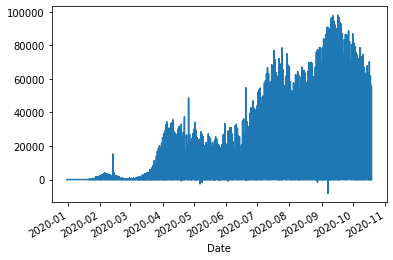

In [38]:
jdf['Confirmed'].plot()

In [39]:
con_cases = jdf['Confirmed'].sum()
dt_cases = jdf['Deaths'].sum()

In [40]:
fatality_rate = dt_cases/(con_cases+dt_cases)*100

In [41]:
# World case fatality rate
print('World case fatality rate :', fatality_rate)

World case fatality rate : 2.7040094827951977


In [42]:
# Total covid-19 fatalities worldwide
print('Total fatalities :', dt_cases)

Total fatalities : 1114636


In [43]:
# Total covid-19 confirmed cases worldwide
print('Total confirmed cases :', con_cases)

Total confirmed cases : 40106965


In [44]:
# visualization of some countries in the world to monitor the situation

# CHINA STATE
df_cn = jdf[jdf['Country']=='China'].reset_index()
# ITALY STATE               
df_it = jdf[jdf['Country']=='Italy'].reset_index()
# IRAN STATE
df_ir = jdf[jdf['Country']=='Iran'].reset_index()
# SPAIN STATE
df_sp = jdf[jdf['Country']=='Spain'].reset_index()
# FRANCE STATE
df_fr = jdf[jdf['Country']=='France'].reset_index()
# SOUTH KOREA STATE
df_skr = jdf[jdf['Country']=='South Korea'].reset_index()

# filter down on dates
df_cn  = df_cn[df_cn['Date'] >= ('2020-01-17')]
df_it = df_it[df_it['Date'] >= ('2020-01-17')]
df_ir = df_ir[df_ir['Date'] >= ('2020-01-17')]
df_sp = df_sp[df_sp['Date'] >= ('2020-01-17')]
df_fr = df_fr[df_fr['Date'] >= ('2020-01-17')]
df_skr = df_skr[df_skr['Date'] >= ('2020-01-17')]

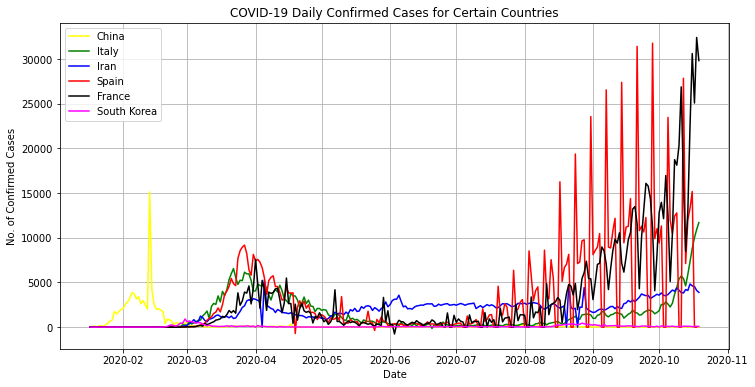

In [45]:
# plotting

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_cn['Date'], df_cn['Confirmed'],color='yellow')
ax.plot(df_it['Date'], df_it['Confirmed'],color='green')
ax.plot(df_ir['Date'], df_ir['Confirmed'],color='blue')
ax.plot(df_sp['Date'], df_sp['Confirmed'],color='red')
ax.plot(df_fr['Date'], df_fr['Confirmed'],color='black')
ax.plot(df_skr['Date'], df_skr['Confirmed'],color='magenta')



ax.set(xlabel='Date', ylabel='No. of Confirmed Cases',
       title='COVID-19 Daily Confirmed Cases for Certain Countries')
ax.legend(['China','Italy','Iran','Spain','France','South Korea'])
ax.grid()
plt.savefig('covidstate1')

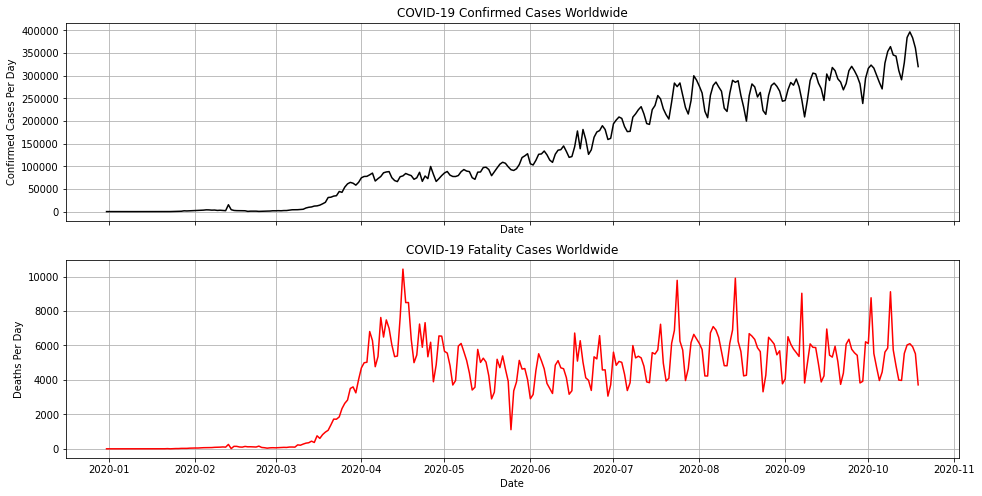

In [46]:
wdf = jdf.groupby(['Date'])[['Confirmed','Deaths']].sum().reset_index()

#plotting new cases by day worldwide
plt.rcParams['figure.figsize'] = [16, 8]
fig, ax = plt.subplots(2,sharex=True)

# top chart as confirmed cases
ax[0].plot(wdf['Date'], wdf['Confirmed'],color='black')
ax[0].set(xlabel='Date', ylabel='Confirmed Cases Per Day',
       title='COVID-19 Confirmed Cases Worldwide')
ax[0].grid()
plt.savefig('covidworldwidestate')

# bottom chart as deaths
ax[1].plot(wdf['Date'], wdf['Deaths'],color='red')
ax[1].set(xlabel='Date', ylabel='Deaths Per Day',
       title='COVID-19 Fatality Cases Worldwide')
ax[1].grid()
plt.savefig('covidworldwidedeaths')

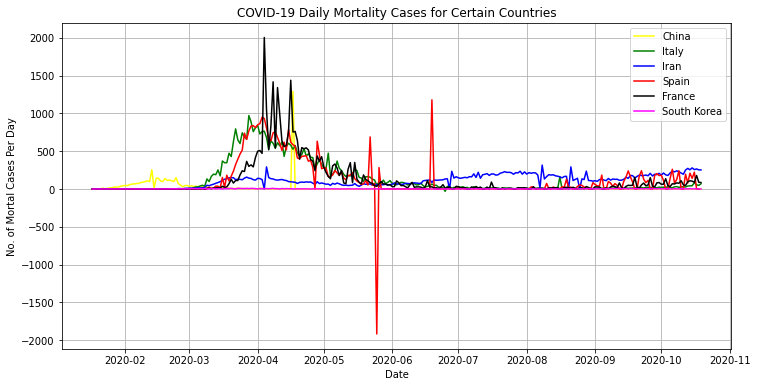

In [47]:
# plotting

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_cn['Date'], df_cn['Deaths'],color='yellow')
ax.plot(df_it['Date'], df_it['Deaths'],color='green')
ax.plot(df_ir['Date'], df_ir['Deaths'],color='blue')
ax.plot(df_sp['Date'], df_sp['Deaths'],color='red')
ax.plot(df_fr['Date'], df_fr['Deaths'],color='black')
ax.plot(df_skr['Date'], df_skr['Deaths'],color='magenta')



ax.set(xlabel='Date', ylabel='No. of Mortal Cases Per Day',
       title='COVID-19 Daily Mortality Cases for Certain Countries')
ax.legend(['China','Italy','Iran','Spain','France','South Korea'])
ax.grid()
plt.savefig('covideathsstate2')

In [48]:
# Calculate Italy mortality rate
df_it
itcon = df_it['Confirmed'].sum()
itdt = df_it['Deaths'].sum()
it_mort_rate = itdt/(itcon+itdt)*100

In [49]:
it_mort_rate

8.106543266841769

In [50]:
# Italy mortality rate Compared to World Average
itw = (it_mort_rate/fatality_rate) * 100

In [51]:
print('Italy Mortality Rate Compared to World Average is :', itw ,'%')

Italy Mortality Rate Compared to World Average is : 299.7971463643628 %


In [52]:
# Calculate China mortality rate
df_cn
chcon = df_cn['Confirmed'].sum()
chdt = df_cn['Deaths'].sum()
ch_mort_rate = chdt/(chcon+chdt)*100

In [53]:
ch_mort_rate

4.952430737062206

In [54]:
# China Mortality rate compared to World Average
chw = (ch_mort_rate/fatality_rate) * 100

In [55]:
print('China Mortality Rate Compared to World Average is :', chw ,'%')

China Mortality Rate Compared to World Average is : 183.1513819967363 %


In [56]:
# Calculate Spain mortality rate
df_sp
spcon = df_sp['Confirmed'].sum()
spdt = df_sp['Deaths'].sum()
sp_mort_rate = spdt/(spcon+spdt)*100

In [57]:
sp_mort_rate

3.4807566459006427

In [58]:
# Spain Mortality rate compared to World Average
spw = (sp_mort_rate/fatality_rate) * 100

In [59]:
print('Spain Mortality Rate Compared to World Average is :', spw ,'%')

Spain Mortality Rate Compared to World Average is : 128.725755883907 %


In [60]:
# Calculate France mortality rate
df_fr
frcon = df_fr['Confirmed'].sum()
frdt = df_fr['Deaths'].sum()
fr_mort_rate = frdt/(frcon+frdt)*100

In [61]:
fr_mort_rate

3.5977006182624387

In [62]:
# France Mortality rate compared to World Average
frw = (fr_mort_rate/fatality_rate) * 100

In [63]:
print('France Mortality Rate Compared to World Average is :', frw ,'%')

France Mortality Rate Compared to World Average is : 133.05059176580295 %


In [64]:
# Calculate Iran mortality rate
df_ir
ircon = df_ir['Confirmed'].sum()
irdt = df_ir['Deaths'].sum()
ir_mort_rate = irdt/(ircon+irdt)*100

In [65]:
ir_mort_rate

5.416804130145964

In [66]:
# Iran Mortality rate compared to World Average
irw = (ir_mort_rate/fatality_rate) * 100

In [67]:
print('Iran Mortality Rate Compared to World Average is :', irw ,'%')

Iran Mortality Rate Compared to World Average is : 200.32489399950205 %


In [68]:
# # visualization of some countries in the world to monitor the situation part 2

# Germany STATE
df_gr = jdf[jdf['Country']=='Germany'].reset_index()
# USA STATE               
df_us = jdf[jdf['Country']=='US'].reset_index()
# UK STATE
df_uk = jdf[jdf['Country']=='UK'].reset_index()
# NL STATE
df_nl = jdf[jdf['Country']=='Netherlands'].reset_index()
# SWISS STATE
df_sw = jdf[jdf['Country']=='Switzerland'].reset_index()
# Japan STATE
df_jp = jdf[jdf['Country']=='Japan'].reset_index()

# filter down on dates
df_gr  = df_gr[df_gr['Date'] >= ('2020-01-17')]
df_us = df_us[df_us['Date'] >= ('2020-01-17')]
df_uk = df_uk[df_uk['Date'] >= ('2020-01-17')]
df_nl = df_nl[df_nl['Date'] >= ('2020-01-17')]
df_sw = df_sw[df_sw['Date'] >= ('2020-01-17')]
df_jp = df_jp[df_jp['Date'] >= ('2020-01-17')]

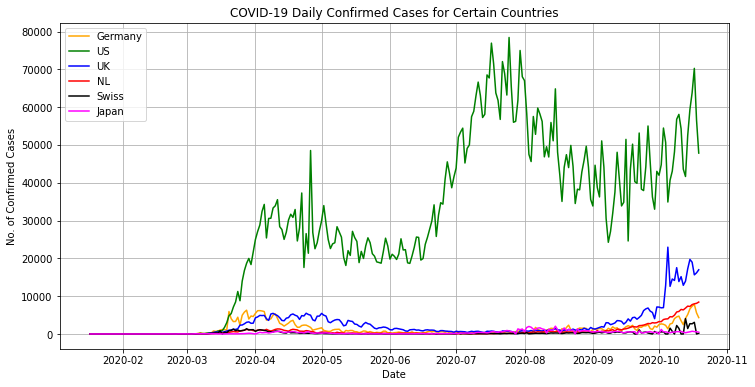

In [69]:
# plotting

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_gr['Date'], df_gr['Confirmed'],color='orange')
ax.plot(df_us['Date'], df_us['Confirmed'],color='green')
ax.plot(df_uk['Date'], df_uk['Confirmed'],color='blue')
ax.plot(df_nl['Date'], df_nl['Confirmed'],color='red')
ax.plot(df_sw['Date'], df_sw['Confirmed'],color='black')
ax.plot(df_jp['Date'], df_jp['Confirmed'],color='magenta')


ax.set(xlabel='Date', ylabel='No. of Confirmed Cases',
       title='COVID-19 Daily Confirmed Cases for Certain Countries')
ax.legend(['Germany','US','UK','NL','Swiss','Japan'])
ax.grid()
plt.savefig('covidstate2')

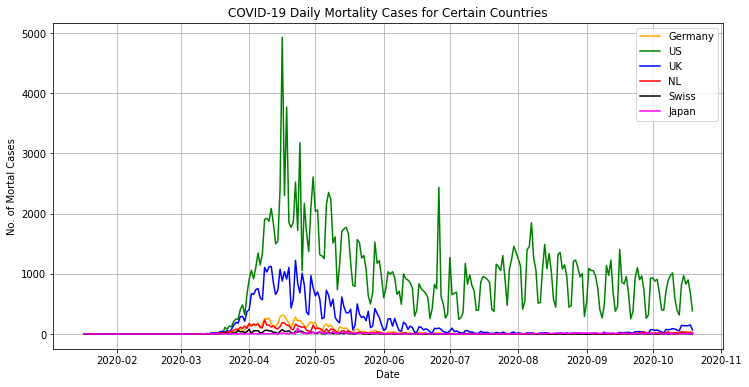

In [70]:
# plotting

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_gr['Date'], df_gr['Deaths'],color='orange')
ax.plot(df_us['Date'], df_us['Deaths'],color='green')
ax.plot(df_uk['Date'], df_uk['Deaths'],color='blue')
ax.plot(df_nl['Date'], df_nl['Deaths'],color='red')
ax.plot(df_sw['Date'], df_sw['Deaths'],color='black')
ax.plot(df_jp['Date'], df_jp['Deaths'],color='magenta')


ax.set(xlabel='Date', ylabel='No. of Mortal Cases',
       title='COVID-19 Daily Mortality Cases for Certain Countries')
ax.legend(['Germany','US','UK','NL','Swiss','Japan'])
ax.grid()
plt.savefig('covideathsstate3')

In [71]:
# visualization of some countries in the world to monitor the situation part 3

# Egypt STATE
df_eg = jdf[jdf['Country']=='Egypt'].reset_index()
# Israel STATE               
df_il = jdf[jdf['Country']=='Israel'].reset_index()
# Turkey STATE
df_tr = jdf[jdf['Country']=='Turkey'].reset_index()
# Iraq STATE
df_iq = jdf[jdf['Country']=='Iraq'].reset_index()
# Qatar STATE
df_qr = jdf[jdf['Country']=='Qatar'].reset_index()
# Bahrain STATE
df_bn = jdf[jdf['Country']=='Bahrain'].reset_index()

# filter down on dates
df_eg  = df_eg[df_eg['Date'] >= ('2020-01-17')]
df_il = df_il[df_il['Date'] >= ('2020-01-17')]
df_tr = df_tr[df_tr['Date'] >= ('2020-01-17')]
df_iq = df_iq[df_iq['Date'] >= ('2020-01-17')]
df_qr = df_qr[df_qr['Date'] >= ('2020-01-17')]
df_bn = df_bn[df_bn['Date'] >= ('2020-01-17')]

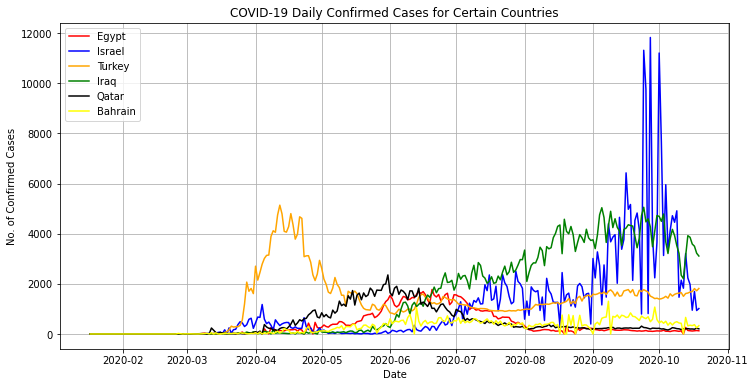

In [72]:
# plotting

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_eg['Date'], df_eg['Confirmed'],color='red')
ax.plot(df_il['Date'], df_il['Confirmed'],color='blue')
ax.plot(df_tr['Date'], df_tr['Confirmed'],color='orange')
ax.plot(df_iq['Date'], df_iq['Confirmed'],color='green')
ax.plot(df_qr['Date'], df_qr['Confirmed'],color='black')
ax.plot(df_bn['Date'], df_bn['Confirmed'],color='yellow')


ax.set(xlabel='Date', ylabel='No. of Confirmed Cases',
       title='COVID-19 Daily Confirmed Cases for Certain Countries')
ax.legend(['Egypt','Israel','Turkey','Iraq','Qatar','Bahrain'])
ax.grid()
plt.savefig('covidstate3')

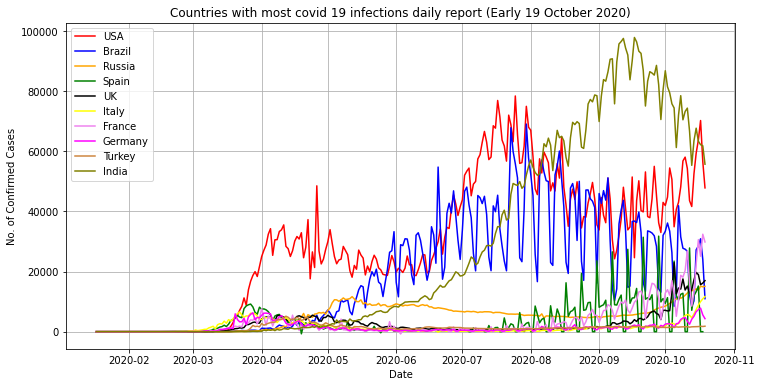

In [73]:
# visualization of some countries in the world to monitor the situation part 4

# Brazil STATE
df_br = jdf[jdf['Country']=='Brazil'].reset_index()
df_br = df_br[df_br['Date'] >= ('2020-01-17')]

# Russia STATE
df_ru = jdf[jdf['Country']=='Russia'].reset_index()
df_ru = df_ru[df_ru['Date'] >= ('2020-01-17')]

# India STATE
df_in = jdf[jdf['Country']=='India'].reset_index()
df_in = df_in[df_in['Date'] >= ('2020-01-17')]


# plotting Some Countries with most covid 19 infections (needs review to add more countries)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_us['Date'], df_us['Confirmed'],color='red')
ax.plot(df_br['Date'], df_br['Confirmed'],color='blue')
ax.plot(df_ru['Date'], df_ru['Confirmed'],color='orange')
ax.plot(df_sp['Date'], df_sp['Confirmed'],color='green')
ax.plot(df_uk['Date'], df_uk['Confirmed'],color='black')
ax.plot(df_it['Date'], df_it['Confirmed'],color='yellow')
ax.plot(df_fr['Date'], df_fr['Confirmed'],color='violet')
ax.plot(df_gr['Date'], df_gr['Confirmed'],color='magenta')
ax.plot(df_tr['Date'], df_tr['Confirmed'],color='peru')
ax.plot(df_in['Date'], df_in['Confirmed'],color='olive')

ax.set(xlabel='Date', ylabel='No. of Confirmed Cases',
       title='Countries with most covid 19 infections daily report (Early 19 October 2020)')
ax.legend(['USA','Brazil','Russia','Spain','UK','Italy', 'France', 'Germany', 'Turkey', 'India'])
ax.grid()
plt.savefig('topcovidstate')

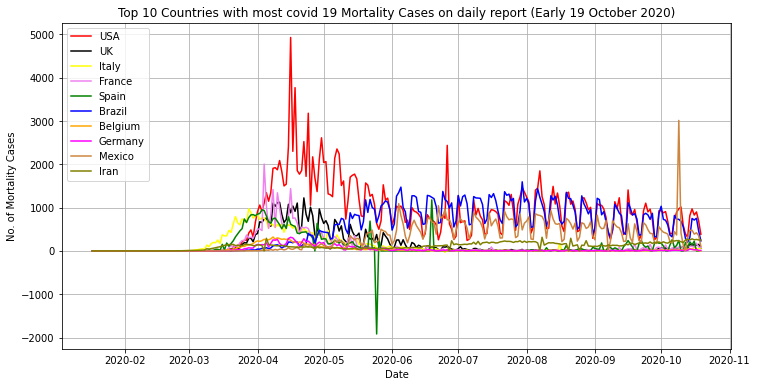

In [74]:
# Belgium STATE
df_bgm = jdf[jdf['Country']=='Belgium'].reset_index()
df_bgm = df_bgm[df_bgm['Date'] >= ('2020-01-17')]

# Mexico STATE
df_mx = jdf[jdf['Country']=='Mexico'].reset_index()
df_mx = df_mx[df_mx['Date'] >= ('2020-01-17')]

# plotting Top 10 Countries with most covid 19 Fatalities (needs review to add more countries)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_us['Date'], df_us['Deaths'],color='red')
ax.plot(df_uk['Date'], df_uk['Deaths'],color='black')
ax.plot(df_it['Date'], df_it['Deaths'],color='yellow')
ax.plot(df_fr['Date'], df_fr['Deaths'],color='violet')
ax.plot(df_sp['Date'], df_sp['Deaths'],color='green')
ax.plot(df_br['Date'], df_br['Deaths'],color='blue')
ax.plot(df_bgm['Date'], df_bgm['Deaths'],color='orange')
ax.plot(df_gr['Date'], df_gr['Deaths'],color='magenta')
ax.plot(df_mx['Date'], df_mx['Deaths'],color='peru')
ax.plot(df_ir['Date'], df_ir['Deaths'],color='olive')

ax.set(xlabel='Date', ylabel='No. of Mortality Cases',
       title='Top 10 Countries with most covid 19 Mortality Cases on daily report (Early 19 October 2020)')
ax.legend(['USA','UK','Italy','France','Spain','Brazil', 'Belgium', 'Germany', 'Mexico', 'Iran'])
ax.grid()
plt.savefig('topmortcovidstate')

In [75]:
# South Africa STATE
df_sa = jdf[jdf['Country']=='South Africa'].reset_index()
# KSA STATE               
df_ksa = jdf[jdf['Country']=='Saudi Arabia'].reset_index()
# India STATE
df_in = jdf[jdf['Country']=='India'].reset_index()
# Russia STATE
df_ru = jdf[jdf['Country']=='Russia'].reset_index()
# Norway STATE
df_no = jdf[jdf['Country']=='Norway'].reset_index()
# Australia STATE
df_au = jdf[jdf['Country']=='Australia'].reset_index()
# Pakistan STATE
df_pk = jdf[jdf['Country']=='Pakistan'].reset_index()
# Indonesia STATE
df_inesia = jdf[jdf['Country']=='Indonesia'].reset_index()
# Brazil STATE
df_br = jdf[jdf['Country']=='Brazil'].reset_index()
# Sweden STATE
df_swd = jdf[jdf['Country']=='Sweden'].reset_index()


# filter down on dates
df_sa  = df_sa[df_sa['Date'] >= ('2020-01-17')]
df_ksa = df_ksa[df_ksa['Date'] >= ('2020-01-17')]
df_in = df_in[df_in['Date'] >= ('2020-01-17')]
df_ru = df_ru[df_ru['Date'] >= ('2020-01-17')]
df_no = df_no[df_no['Date'] >= ('2020-01-17')]
df_au = df_au[df_au['Date'] >= ('2020-01-17')]
df_pk = df_pk[df_pk['Date'] >= ('2020-01-17')]
df_inesia = df_inesia[df_inesia['Date'] >= ('2020-01-17')]
df_br = df_br[df_br['Date'] >= ('2020-01-17')]
df_swd = df_swd[df_swd['Date'] >= ('2020-01-17')]

In [76]:
#Germany

df_gr
grcon = df_gr['Confirmed'].sum()
grdt = df_gr['Deaths'].sum()
gr_mort_rate = grdt/(grcon+grdt)*100

In [77]:
#US

df_us
uscon = df_us['Confirmed'].sum()
usdt = df_us['Deaths'].sum()
us_mort_rate = usdt/(uscon+usdt)*100

In [78]:
#UK

df_uk
ukcon = df_uk['Confirmed'].sum()
ukdt = df_uk['Deaths'].sum()
uk_mort_rate = ukdt/(ukcon+ukdt)*100

In [79]:
#Netherlands

df_nl
nlcon = df_nl['Confirmed'].sum()
nldt = df_nl['Deaths'].sum()
nl_mort_rate = nldt/(nlcon+nldt)*100

In [80]:
#Swiss

df_sw
swcon = df_sw['Confirmed'].sum()
swdt = df_sw['Deaths'].sum()
sw_mort_rate = swdt/(swcon+swdt)*100

In [81]:
#South Korea

df_skr
skrcon = df_skr['Confirmed'].sum()
skrdt = df_skr['Deaths'].sum()
skr_mort_rate = skrdt/(skrcon+skrdt)*100

In [82]:
#Japan

df_jp
jpcon = df_jp['Confirmed'].sum()
jpdt = df_jp['Deaths'].sum()
jp_mort_rate = jpdt/(jpcon+jpdt)*100

In [83]:
#Egypt

df_eg
egcon = df_eg['Confirmed'].sum()
egdt = df_eg['Deaths'].sum()
eg_mort_rate = egdt/(egcon+egdt)*100

In [84]:
#Israel

df_il
ilcon = df_il['Confirmed'].sum()
ildt = df_il['Deaths'].sum()
il_mort_rate = ildt/(ilcon+ildt)*100

In [85]:
#Iraq

df_iq
iqcon = df_iq['Confirmed'].sum()
iqdt = df_iq['Deaths'].sum()
iq_mort_rate = iqdt/(iqcon+iqdt)*100

In [86]:
#Turkey

df_tr
trcon = df_tr['Confirmed'].sum()
trdt = df_tr['Deaths'].sum()
tr_mort_rate = trdt/(trcon+trdt)*100

In [87]:
#Qatar

df_qr
qrcon = df_qr['Confirmed'].sum()
qrdt = df_qr['Deaths'].sum()
qr_mort_rate = qrdt/(qrcon+qrdt)*100

In [88]:
#Bahrain

df_bn
bncon = df_bn['Confirmed'].sum()
bndt = df_bn['Deaths'].sum()
bn_mort_rate = bndt/(bncon+bndt)*100

In [89]:
#South Africa

df_sa
sacon = df_sa['Confirmed'].sum()
sadt = df_sa['Deaths'].sum()
sa_mort_rate = sadt/(sacon+sadt)*100

In [90]:
#India

df_in
incon = df_in['Confirmed'].sum()
indt = df_in['Deaths'].sum()
in_mort_rate = indt/(incon+indt)*100

In [91]:
#Pakistan

df_pk
pkcon = df_pk['Confirmed'].sum()
pkdt = df_pk['Deaths'].sum()
pk_mort_rate = pkdt/(pkcon+pkdt)*100

In [92]:
#Russia

df_ru
rucon = df_ru['Confirmed'].sum()
rudt = df_ru['Deaths'].sum()
ru_mort_rate = rudt/(rucon+rudt)*100

In [93]:
# Norway

df_no
nocon = df_no['Confirmed'].sum()
nodt = df_no['Deaths'].sum()
no_mort_rate = nodt/(nocon+nodt)*100

In [94]:
# KSA

df_ksa
ksacon = df_ksa['Confirmed'].sum()
ksadt = df_ksa['Deaths'].sum()
ksa_mort_rate = ksadt/(ksacon+ksadt)*100

In [95]:
# Australia

df_au
aucon = df_au['Confirmed'].sum()
audt = df_au['Deaths'].sum()
au_mort_rate = audt/(aucon+audt)*100

In [96]:
# Indonesia

df_inesia
inesiacon = df_inesia['Confirmed'].sum()
inesiadt = df_inesia['Deaths'].sum()
inesia_mort_rate = inesiadt/(inesiacon+inesiadt)*100

In [97]:
# Brazil

df_br
brcon = df_br['Confirmed'].sum()
brdt = df_br['Deaths'].sum()
br_mort_rate = brdt/(brcon+brdt)*100

In [98]:
# Sweden
df_swd
swdcon = df_swd['Confirmed'].sum()
swddt = df_swd['Deaths'].sum()
swd_mort_rate = swddt/(swdcon+swddt)*100

In [99]:
# monitor the situation

twc = jdf.Confirmed.sum()
twd = jdf.Deaths.sum()

In [100]:
data = {'Confirmed Cases Worldwide (Per Million)':twc,'Death Cases Worldwide (Per Thousand)':twd,'World Fatality_rate % (Percentage)':fatality_rate, 
       'China Confirmed Cases':chcon, 'China Death Cases':chdt, 'China Fatality Rate %':ch_mort_rate,
       'Italy Confirmed Cases':itcon, 'Italy Death Cases':itdt, 'Italy Fatality Rate %':it_mort_rate,
       'Spain Confirmed Cases':spcon, 'Spain Death Cases':spdt, 'Spain Fatality Rate %': sp_mort_rate,
       'France Confirmed Cases':frcon, 'France Death Cases':frdt, 'France Fatality Rate %':fr_mort_rate,
       'Iran Confirmed Cases':ircon, 'Iran Death Cases':irdt, 'Iran Fatality Rate %':ir_mort_rate,
       'Germany Confirmed Cases':grcon, 'Germany Death Cases':grdt, 'Germany Fatality Rate %':gr_mort_rate,
       'US Confirmed Cases':uscon, 'US Death Cases':usdt, 'US Fatality Rate %':us_mort_rate,
       'UK Confirmed Cases':ukcon, 'UK Death Cases':ukdt, 'UK Fatality Rate %':uk_mort_rate,
       'Netherlands (Holland) Confirmed Cases':nlcon, 'Netherlands (Holland) Death Cases':nldt, 'Netherlands (Holland) Fatality Rate %':nl_mort_rate,
       'Swiss Confirmed Cases':swcon, 'Swiss Death Cases':swdt, 'Swiss Fatality Rate %':sw_mort_rate,
       'Norway Confirmed Cases':nocon, 'Norway Death Cases':nodt, 'Norway Fatality Rate %':no_mort_rate,
       'Sweden Confirmed Cases':swdcon, 'Sweden Death Cases':swddt, 'Sweden Fatality Rate %':swd_mort_rate,
       'South Korea Confirmed Cases':skrcon, 'South Korea Death Cases':skrdt, 'South Korea Fatality Rate %':skr_mort_rate,
       'Japan Confirmed Cases':jpcon, 'Japan Death Cases':jpdt, 'Japan Fatality Rate %':jp_mort_rate,
       'Russia Confirmed Cases':rucon, 'Russia Death Cases':rudt, 'Russia Fatality Rate %':ru_mort_rate,
       'Israel Confirmed Cases':ilcon, 'Israel Death Cases':ildt, 'Israel Fatality Rate %':il_mort_rate,
       'Iraq Confirmed Cases':iqcon, 'Iraq Death Cases':iqdt, 'Iraq Fatality Rate %':iq_mort_rate,
       'Turkey Confirmed Cases':trcon, 'Turkey Death Cases':trdt, 'Turkey Fatality Rate %':tr_mort_rate,
       'Qatar Confirmed Cases':qrcon, 'Qatar Death Cases':qrdt, 'Qatar Fatality Rate %':qr_mort_rate,
       'Saudi Arabia Confirmed Cases':ksacon, 'Saudi Arabia Death Cases':ksadt, 'Saudi Arabia Fatality Rate %': ksa_mort_rate,
       'Egypt Confirmed Cases':egcon, 'Egypt Death Cases':egdt, 'Egypt Fatality Rate %':eg_mort_rate,
       'South Africa Confirmed Cases':sacon, 'South Africa Death Cases':sadt, 'South Africa Fatality Rate %':sa_mort_rate,
       'India Confirmed Cases':incon, 'India Death Cases':indt, 'India Fatality Rate %': in_mort_rate,
       'Pakistan Confirmed Cases':pkcon, 'Pakistan Death Cases':pkdt, 'Pakistan Fatality Rate %': pk_mort_rate,
       'Australia Confirmed Cases':aucon, 'Australia Death Cases':audt, 'Australia Fatality Rate %': au_mort_rate,
       'Indonesia Confirmed Cases':inesiacon, 'Indonesia Death Cases':inesiadt, 'Indonesia Fatality Rate %': inesia_mort_rate,
       'Brazil Confirmed Cases':brcon, 'Brazil Death Cases':brdt, 'Brazil Fatality Rate %': br_mort_rate,
       }

data = pd.DataFrame.from_dict(data, orient='index' ,columns=['Total Count or Rate'])

data.style.background_gradient(cmap='Oranges')

,Total Count or Rate
Confirmed Cases Worldwide (Per Million),40106965.000000
Death Cases Worldwide (Per Thousand),1114636.000000
World Fatality_rate % (Percentage),2.704009
China Confirmed Cases,90913.000000
China Death Cases,4737.000000
China Fatality Rate %,4.952431
Italy Confirmed Cases,414241.000000
Italy Death Cases,36543.000000
Italy Fatality Rate %,8.106543
Spain Confirmed Cases,936560.000000


In [101]:
#data = data.to_csv(r'statistics.csv')

In [102]:
#data = pd.read_csv('statistics.csv')

In [103]:
#data = data.rename(columns={'Unnamed: 0': 'State'})

In [104]:
#data = data.astype({'Total Count or Rate': float})

In [105]:
#data.head(85)

In [106]:
df_per_day = jdf.groupby('Date')[['Confirmed','Deaths']].sum()

In [107]:
df_per_day.head()

,Confirmed,Deaths
Date,,
2019-12-31,27,0
2020-01-01,0,0
2020-01-02,0,0
2020-01-03,17,0
2020-01-04,0,0


In [108]:
df_per_day.tail()

,Confirmed,Deaths
Date,,
2020-10-15,384340,6029
2020-10-16,396737,6104
2020-10-17,383661,5927
2020-10-18,361265,5520
2020-10-19,320154,3713


In [109]:
# Max. No. of confirmed cases per day
df_per_day['Confirmed'].max()

396737

In [110]:
# Date of Max. No. of confirmed cases
df_per_day['Confirmed'].idxmax()

Timestamp('2020-10-16 00:00:00')

In [111]:
# Min. No. of confirmed cases per day
df_per_day['Confirmed'].min()

0

In [112]:
# Date of Min. No. of confirmed cases
df_per_day['Confirmed'].idxmin()

Timestamp('2020-01-01 00:00:00')

In [113]:
# Max. No. of death cases per day
df_per_day['Deaths'].max()

10434

In [114]:
# Date of Max. No. of death cases
df_per_day['Deaths'].idxmax()

Timestamp('2020-04-16 00:00:00')

In [115]:
# Min. No. of death cases per day
df_per_day['Deaths'].min()

0

In [116]:
# Date of Min. No. of death cases
df_per_day['Deaths'].idxmin()

Timestamp('2019-12-31 00:00:00')

In [117]:
jdf['Country'].value_counts()

Guinea                  438
South Korea             294
Iceland                 294
China                   294
Australia               294
                       ... 
Tajikistan              172
Comoros                 171
Lesotho                 158
The Diamond Princess     64
Solomon_Islands           4
Name: Country, Length: 210, dtype: int64

In [118]:
len(jdf['Country'].unique())

210

In [119]:
jdf.loc['2020-01'][['Confirmed','Deaths']].sum()

Confirmed    9799
Deaths        213
dtype: int64

In [120]:
f_rate0 = 213/9797*100
f_rate0

2.1741349392671228

In [121]:
jdf.loc['2020-02-01':'2020-03-01'][['Confirmed','Deaths']].sum()

Confirmed    77265
Deaths        2766
dtype: int64

In [122]:
f_rate1 = 2766/77237*100
f_rate1

3.581185183267087

In [123]:
jdf.loc['2020-03-01':'2020-04-01'][['Confirmed','Deaths']].sum()

Confirmed    800072
Deaths        40660
dtype: int64

In [124]:
f_rate2 = 40220/796685*100
f_rate2

5.048419387838355

In [125]:
jdf.loc['2020-04-01':'2020-05-01'][['Confirmed','Deaths']].sum()

Confirmed    2423811
Deaths        194678
dtype: int64

In [126]:
f_rate3 = 194979/2415517*100
f_rate3

8.071936566788809

In [127]:
jdf.loc['2020-05-01':'2020-06-01'][['Confirmed','Deaths']].sum()

Confirmed    2997093
Deaths        143034
dtype: int64

In [128]:
f_rate4 = 144660/2980360*100
f_rate4

4.853776053899529

In [129]:
jdf.loc['2020-06-01':'2020-07-01'][['Confirmed','Deaths']].sum()

Confirmed    4443405
Deaths        139698
dtype: int64

In [130]:
f_rate5 = 141554/4426923*100
f_rate5

3.1975708635546636

In [131]:
jdf.loc['2020-07-01':'2020-08-01'][['Confirmed','Deaths']].sum()

Confirmed    7344987
Deaths        172335
dtype: int64

In [132]:
f_rate6 = 174174/7334170*100
f_rate6

2.3748290535943397

In [133]:
jdf.loc['2020-08-01':'2020-09-01'][['Confirmed','Deaths']].sum()

Confirmed    8209211
Deaths        182676
dtype: int64

In [134]:
f_rate7 = 91993/3914322*100
f_rate7

2.350164345191837

In [135]:
jdf.loc['2020-09-01':'2020-10-01'][['Confirmed', 'Deaths']].sum()

Confirmed    8775015
Deaths        168287
dtype: int64

In [136]:
jdf.loc['2020-10-01':'2020-11-01'][['Confirmed', 'Deaths']].sum()

Confirmed    6326098
Deaths        105512
dtype: int64

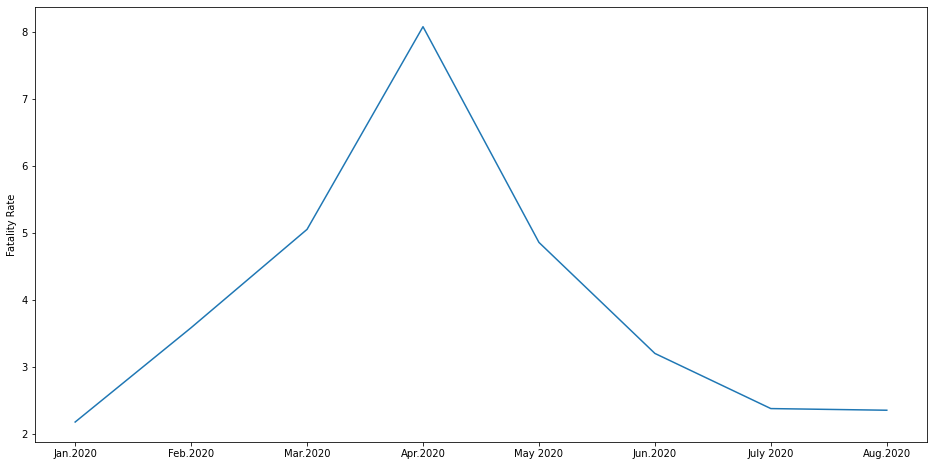

In [137]:
plt.plot(['Jan.2020', 'Feb.2020', 'Mar.2020','Apr.2020', 'May 2020', 'Jun.2020', 'July 2020', 'Aug.2020'], 
         [f_rate0, f_rate1, f_rate2, f_rate3, f_rate4, f_rate5, f_rate6, f_rate7])
#plt.xlablel('Months')
plt.ylabel('Fatality Rate')
plt.show()

<AxesSubplot:xlabel='Date'>

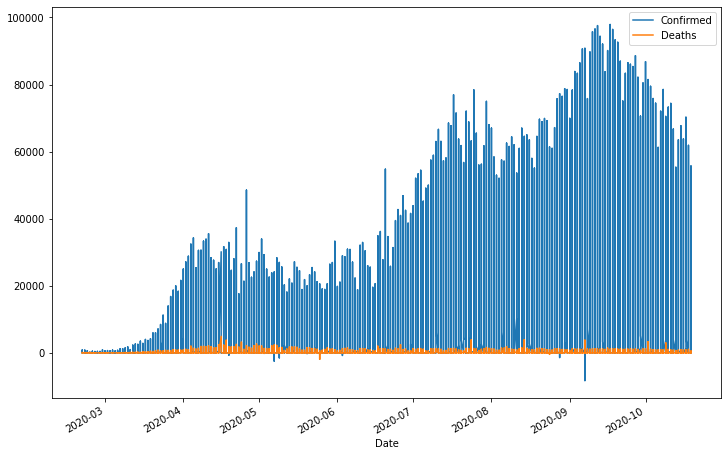

In [138]:
jdf.loc['2020-02-21':'2020-10-19'][['Confirmed','Deaths']].plot(figsize=(12,8))

In [139]:
new_df = jdf.copy()

In [140]:
df_by_date = new_df.groupby(['Date']).sum().reset_index(drop=None)

In [141]:
df_by_date

,Date,Confirmed,Deaths
0,2019-12-31,27,0
1,2020-01-01,0,0
2,2020-01-02,0,0
3,2020-01-03,17,0
4,2020-01-04,0,0
...,...,...,...
289,2020-10-15,384340,6029
290,2020-10-16,396737,6104
291,2020-10-17,383661,5927
292,2020-10-18,361265,5520


<AxesSubplot:>

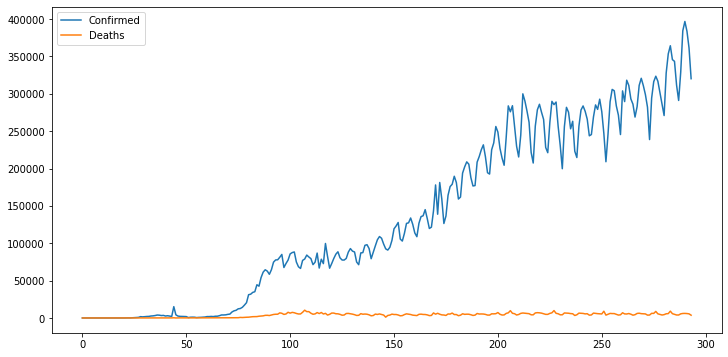

In [142]:
df_by_date[['Confirmed', 'Deaths']].plot(kind='line',figsize=(12,6))

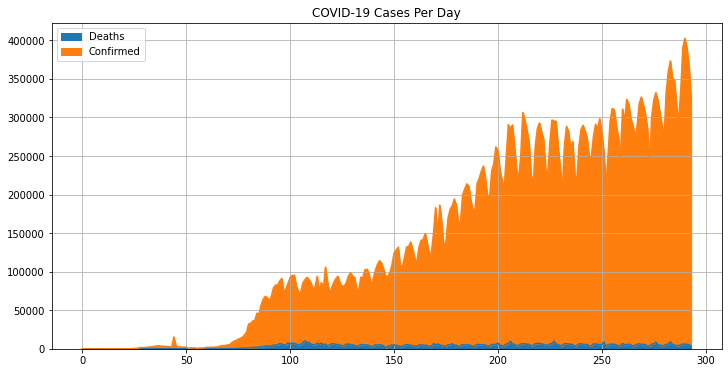

In [143]:
df_by_date[['Deaths','Confirmed']].plot(kind='area', title='COVID-19 Cases Per Day', 
                                        grid=True, figsize=(12,6))
plt.savefig('wcovid19daily22')

In [144]:
# # Situation in Egypt
df_eg.head()

,Date,Confirmed,Deaths,Country,Continent
0,2020-10-19,127,11,Egypt,Africa
1,2020-10-18,138,10,Egypt,Africa
2,2020-10-17,126,11,Egypt,Africa
3,2020-10-16,118,11,Egypt,Africa
4,2020-10-15,128,6,Egypt,Africa


In [145]:
df_eg.tail()

,Date,Confirmed,Deaths,Country,Continent
268,2020-01-21,0,0,Egypt,Africa
269,2020-01-20,0,0,Egypt,Africa
270,2020-01-19,0,0,Egypt,Africa
271,2020-01-18,0,0,Egypt,Africa
272,2020-01-17,0,0,Egypt,Africa


In [146]:
eg_ndf = df_eg.copy()

In [147]:
eg_ndf.set_index('Date', inplace=True)
eg_ndf.sort_index(inplace=True)

In [148]:
eg_ndf.loc['2020-02-01':'2020-03-01'][['Confirmed','Deaths']].sum()

Confirmed    1
Deaths       0
dtype: int64

In [149]:
eg_ndf.loc['2020-03-01':'2020-04-01'][['Confirmed','Deaths']].sum()

Confirmed    655
Deaths        41
dtype: int64

In [150]:
eg_ndf.loc['2020-04-01':'2020-05-01'][['Confirmed','Deaths']].sum()

Confirmed    4928
Deaths        352
dtype: int64

In [151]:
eg_ndf.loc['2020-05-01':'2020-06-01'][['Confirmed','Deaths']].sum()

Confirmed    19717
Deaths         579
dtype: int64

In [152]:
eg_ndf.loc['2020-06-01':'2020-07-01'][['Confirmed','Deaths']].sum()

Confirmed    44862
Deaths        2040
dtype: int64

In [153]:
eg_ndf.loc['2020-07-01':'2020-08-01'][['Confirmed','Deaths']].sum()

Confirmed    27324
Deaths        1933
dtype: int64

In [154]:
eg_ndf.loc['2020-08-01':'2020-09-01'][['Confirmed','Deaths']].sum()

Confirmed    5182
Deaths        647
dtype: int64

In [155]:
eg_ndf.loc['2020-09-01':'2020-10-01'][['Confirmed','Deaths']].sum()

Confirmed    4471
Deaths        531
dtype: int64

In [156]:
eg_ndf.loc['2020-10-01':'2020-11-01'][['Confirmed','Deaths']].sum()

Confirmed    2345
Deaths        206
dtype: int64

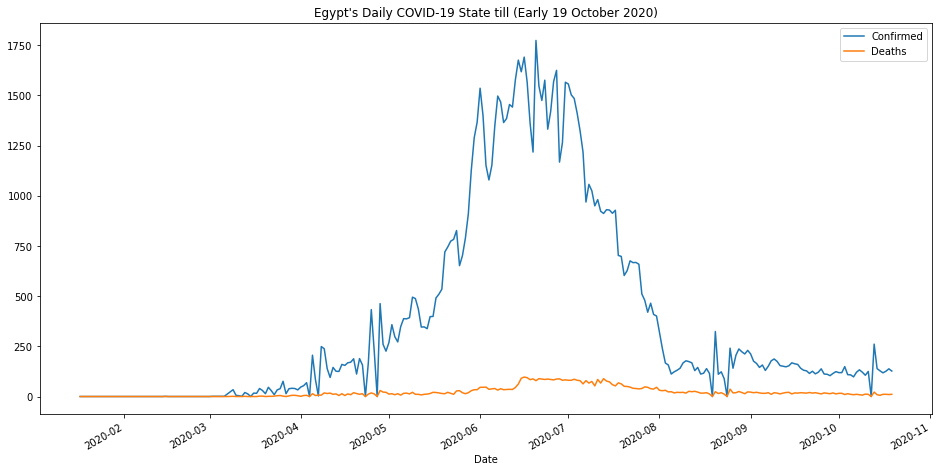

In [157]:
eg_ndf.plot()
plt.title("Egypt's Daily COVID-19 State till (Early 19 October 2020)")
plt.savefig('egycov19state')

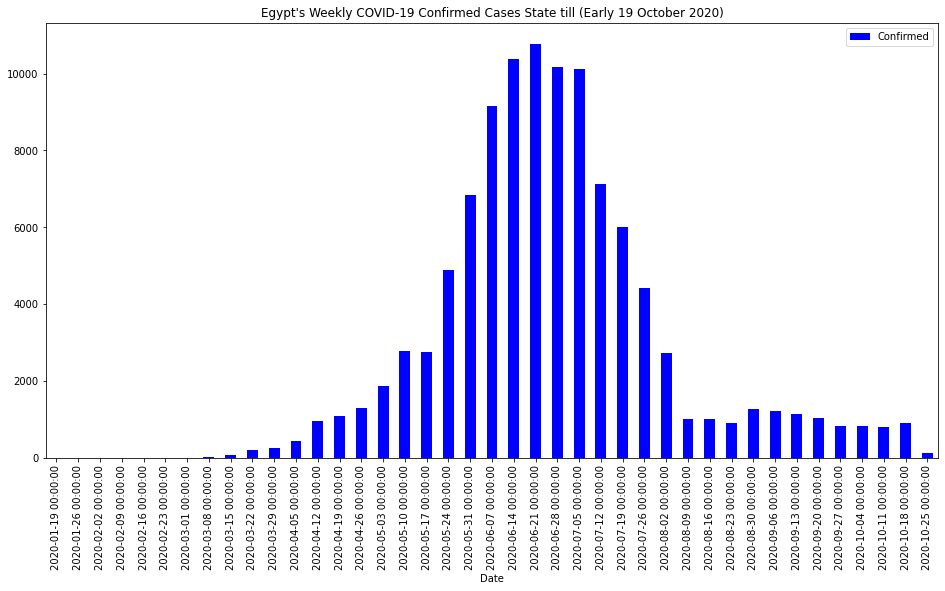

In [158]:
eg_ndf['Confirmed'].resample('W').sum().plot(kind='bar', color='blue', legend=True)
plt.title("Egypt's Weekly COVID-19 Confirmed Cases State till (Early 19 October 2020)")
plt.savefig('egycov19weeklystate')

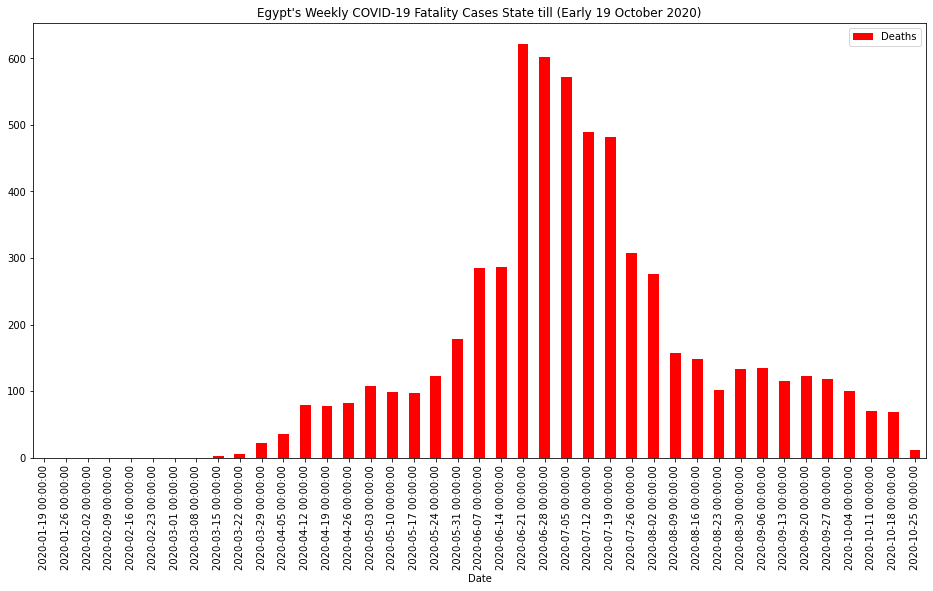

In [159]:
eg_ndf['Deaths'].resample('W').sum().plot(kind='bar', color='red', legend=True)
plt.title("Egypt's Weekly COVID-19 Fatality Cases State till (Early 19 October 2020)")
plt.savefig('egycov19weeklystate')

<AxesSubplot:title={'center':"Egypt's Daily COVID-19 State"}, xlabel='Date'>

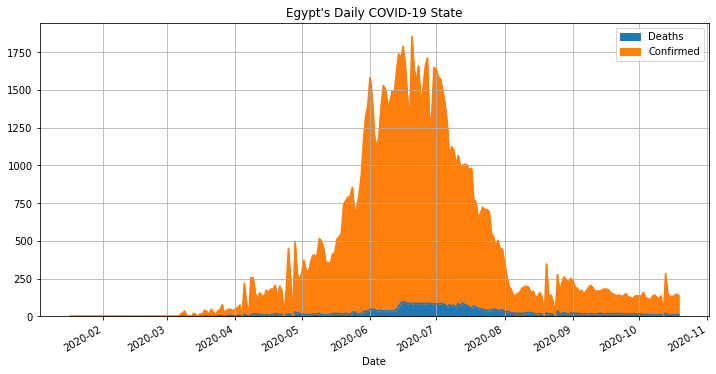

In [160]:
eg_ndf[['Deaths','Confirmed']].plot(kind='area', title="Egypt's Daily COVID-19 State", 
                                        grid=True, figsize=(12,6))

In [161]:
# Max. No. of confirmed cases recorded per day in Egypt
eg_ndf['Confirmed'].max()

1774

In [162]:
# Date of Max. No. of confirmed cases recorded in Egypt
eg_ndf['Confirmed'].idxmax()

Timestamp('2020-06-20 00:00:00')

In [163]:
# Max. No. of death cases recorded per day in Egypt
eg_ndf['Deaths'].max()

97

In [164]:
# Date of Max. No. of confirmed cases recorded in Egypt
eg_ndf['Deaths'].idxmax()

Timestamp('2020-06-16 00:00:00')